## Notebook for data viz

To explore the features and targets

In [1]:
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

os.chdir('..') ; sys.path.append(os.getcwd())
# sys.path.append('../..')

print(sys.path, os.getcwd())

['', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python35.zip', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/plat-x86_64-linux-gnu', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/lib-dynload', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.5/site-packages/IPython/extensions', '/cluster/storage/vcharvet/.ipython', '/cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge'] /cluster/storage/vcharvet/workspace/pythonProjects/geoloc-challenge


## Loading data

In [2]:
train_path = 'data/Train/train_dataset.csv'

train_df = pd.read_csv(train_path, sep=',')
# train_labels = train_df.loc[:, ['latitude', 'longitude']]

# train_df.drop(['latitude', 'longitude'], axis=1, inplace=True)


In [6]:
from utils.plot_map import PlotMap
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [7]:
PlotMap(train_labels)

## Statistics and types   

In [12]:
train_df.describe()

,Unnamed: 0,did,time_ux,time_ux_client,speed,altitude,nb_satellites,radius,seqnumber,nseq,rssi,bsid,snr,freq
count,1.333141e+07,1.333141e+07,1.333141e+07,1.333110e+07,1.044412e+07,0.0,0.0,2.286515e+06,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07,1.333141e+07
mean,8.229054e+06,4.642411e+06,1.524300e+12,1.524300e+12,6.049486e+00,NaN,NaN,6.592456e+01,1.918081e+03,2.241191e-01,-1.248060e+02,5.587256e+03,2.022780e+01,8.681276e+08
std,4.751084e+06,1.795972e+06,4.802829e+09,4.802721e+09,1.712878e+01,NaN,NaN,8.713133e+01,1.231801e+03,5.693585e-01,1.035894e+01,4.755207e+03,1.082118e+01,4.863133e+04
min,0.000000e+00,8.624500e+04,1.514765e+12,1.514764e+12,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.660000e+02,9.310000e+02,-8.200000e-01,8.680341e+08
25%,4.114669e+06,3.595222e+06,1.520346e+12,1.520346e+12,0.000000e+00,NaN,NaN,0.000000e+00,7.970000e+02,0.000000e+00,-1.320000e+02,2.790000e+03,1.250000e+01,8.680889e+08
50%,8.228712e+06,5.135181e+06,1.525278e+12,1.525278e+12,0.000000e+00,NaN,NaN,0.000000e+00,1.783000e+03,0.000000e+00,-1.260000e+02,3.559000e+03,1.774000e+01,8.681274e+08
75%,1.234409e+07,5.144027e+06,1.528407e+12,1.528407e+12,2.000000e+00,NaN,NaN,1.130000e+02,3.042000e+03,0.000000e+00,-1.190000e+02,8.364000e+03,2.569000e+01,8.681674e+08
max,1.645853e+07,1.332362e+07,1.531267e+12,1.531267e+12,2.550000e+02,NaN,NaN,1.438000e+03,4.095000e+03,2.000000e+00,-5.000000e+01,3.523200e+04,1.008700e+02,8.682260e+08


In [78]:
train_labels.nunique()

latitude     75228
longitude    68977
dtype: int64

In [14]:
print(train_df.shape)
train_df.nunique()

(13331410, 22)


Unnamed: 0        13331410
messageid          2298059
did                  13524
did_hex              13524
time_msg           2111451
time_ux            2111451
time_ux_client     2110337
motion                   2
speed                  252
altitude                 0
nb_satellites            0
data_type                5
radius                 213
datepart               191
seqnumber             4096
dtid                    32
nseq                     3
rssi                   117
bsid_hex               159
bsid                   159
snr                   8701
freq                174892
dtype: int64

*Note*:  `time_msg = datetime.fromtimestamp(time_ux/1e3)`


#### Descriptions of columns

|Column Name| Type |Description|
|-----------|------|-----------|
| Unamed: 0    | __   | row ID |
| messageid | string | identificator for the messages|
|did | int | identification of devices (cellphones)|
|dtid | string | identification of `dt` ?|
| did_hex | ordinal | same as `did` in hexadecimal format | 
| time_msg | datetime | date and time of message (when sent from antenna?) |
| time_ux | int | same as `time_msg` in format ux timestamp|
| time_ux_client | int | ux timestamp of when messages has been received by client |
| motion | bool | weather (receiver) is moving or not, lot of NaN | 
| speed | float | speed of the receiver |
| altitude | __ | all values are NaN |
| nb_satellites | __ | all values are NaN |
| data_type | categorical | type of transmission? |
| radius | float | ? |
| date_part | date | date of (time_msg or time_ux?) |
| seqnumber | int | ? |
| nseq | int | number of sequences ? |
| rssi | float | ? |
|bsid{_hex} | int {string} | id of transmitting balises | 
| snr | float | ? |
| freq | float | frequency of (waves? nb of messages?) |






## Visualization

In [4]:
import seaborn as sns

sns.set()

0.000% of missing values


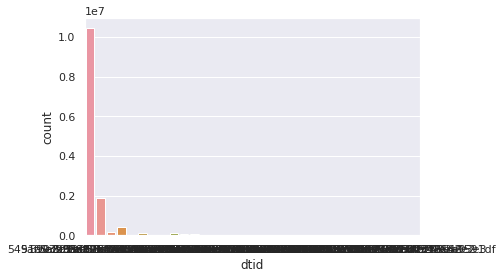

In [6]:
print('{:.3f}% of missing values'.format(train_df['dtid'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['dtid'].dropna())

0.000% of missing values


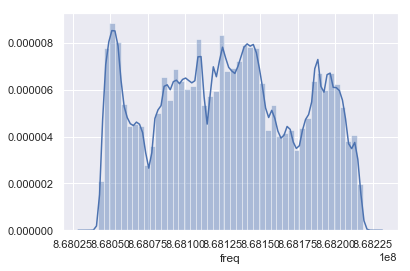

In [75]:
print('{:.3f}% of missing values'.format(train_df['freq'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['freq'].dropna())

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


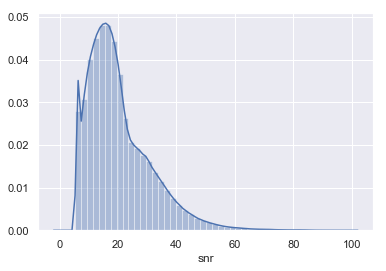

In [74]:
print('{:.3f}% of missing values'.format(train_df['snr'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['snr'].dropna())

0.000% of missing values


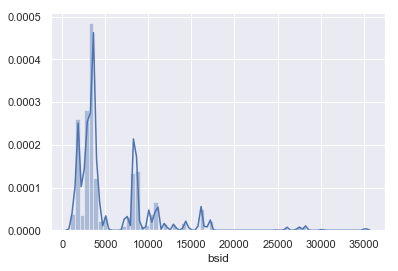

In [72]:
print('{:.3f}% of missing values'.format(train_df['bsid'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['bsid'].dropna(), bins=64)

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


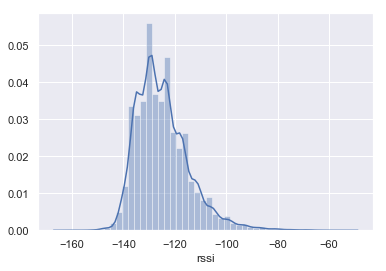

In [70]:
print('{:.3f}% of missing values'.format(train_df['rssi'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['rssi'].dropna())

0.000% of missing values


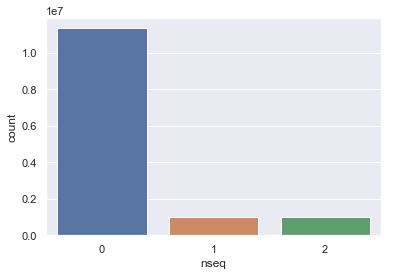

In [68]:
print('{:.3f}% of missing values'.format(train_df['nseq'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['nseq'].fillna('nan'))

0.000% of missing values


/home/infres/vcharvet/workspace/pythonProjects/geoloc-challenge/geolocenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


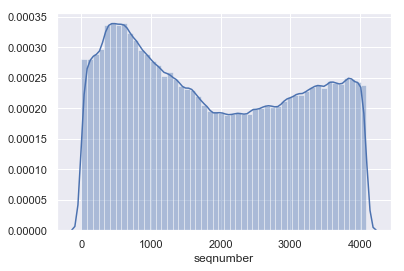

In [64]:
print('{:.3f}% of missing values'.format(train_df['seqnumber'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['seqnumber'].dropna())

82.849% of missing values


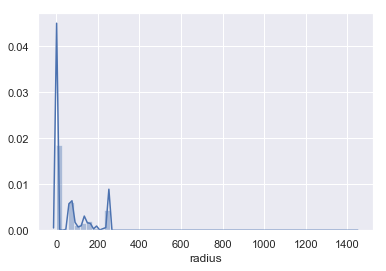

In [57]:
print('{:.3f}% of missing values'.format(train_df['radius'].isna().sum() / train_df.shape[0] * 100 ))

sns.distplot(train_df['radius'].dropna()) # or fillna(-1)?

21.658% of missing values


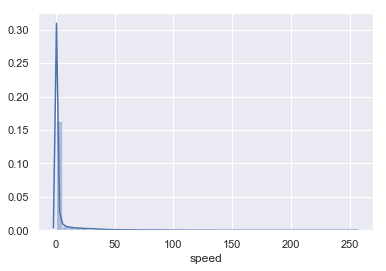

In [56]:
print('{:.3f}% of missing values'.format(train_df['speed'].isna().sum() / train_df.shape[0] * 100 ))
sns.distplot(train_df['speed'].dropna()) # or fillna(-1)

21.658% of missing values


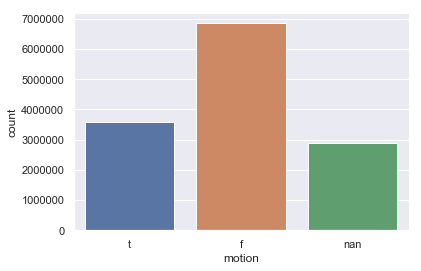

In [58]:
print('{:.3f}% of missing values'.format(train_df['motion'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['motion'].fillna('nan'))

0.000% of missing values


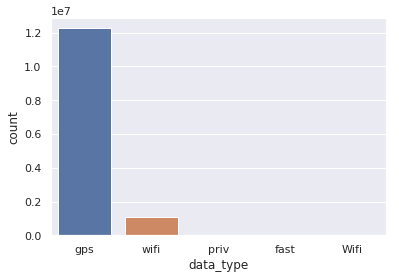

In [5]:
print('{:.3f}% of missing values'.format(train_df['data_type'].isna().sum() / train_df.shape[0] * 100 ))

sns.countplot(train_df['data_type'].fillna('nan'))

ValueError: max must be larger than min in range parameter.

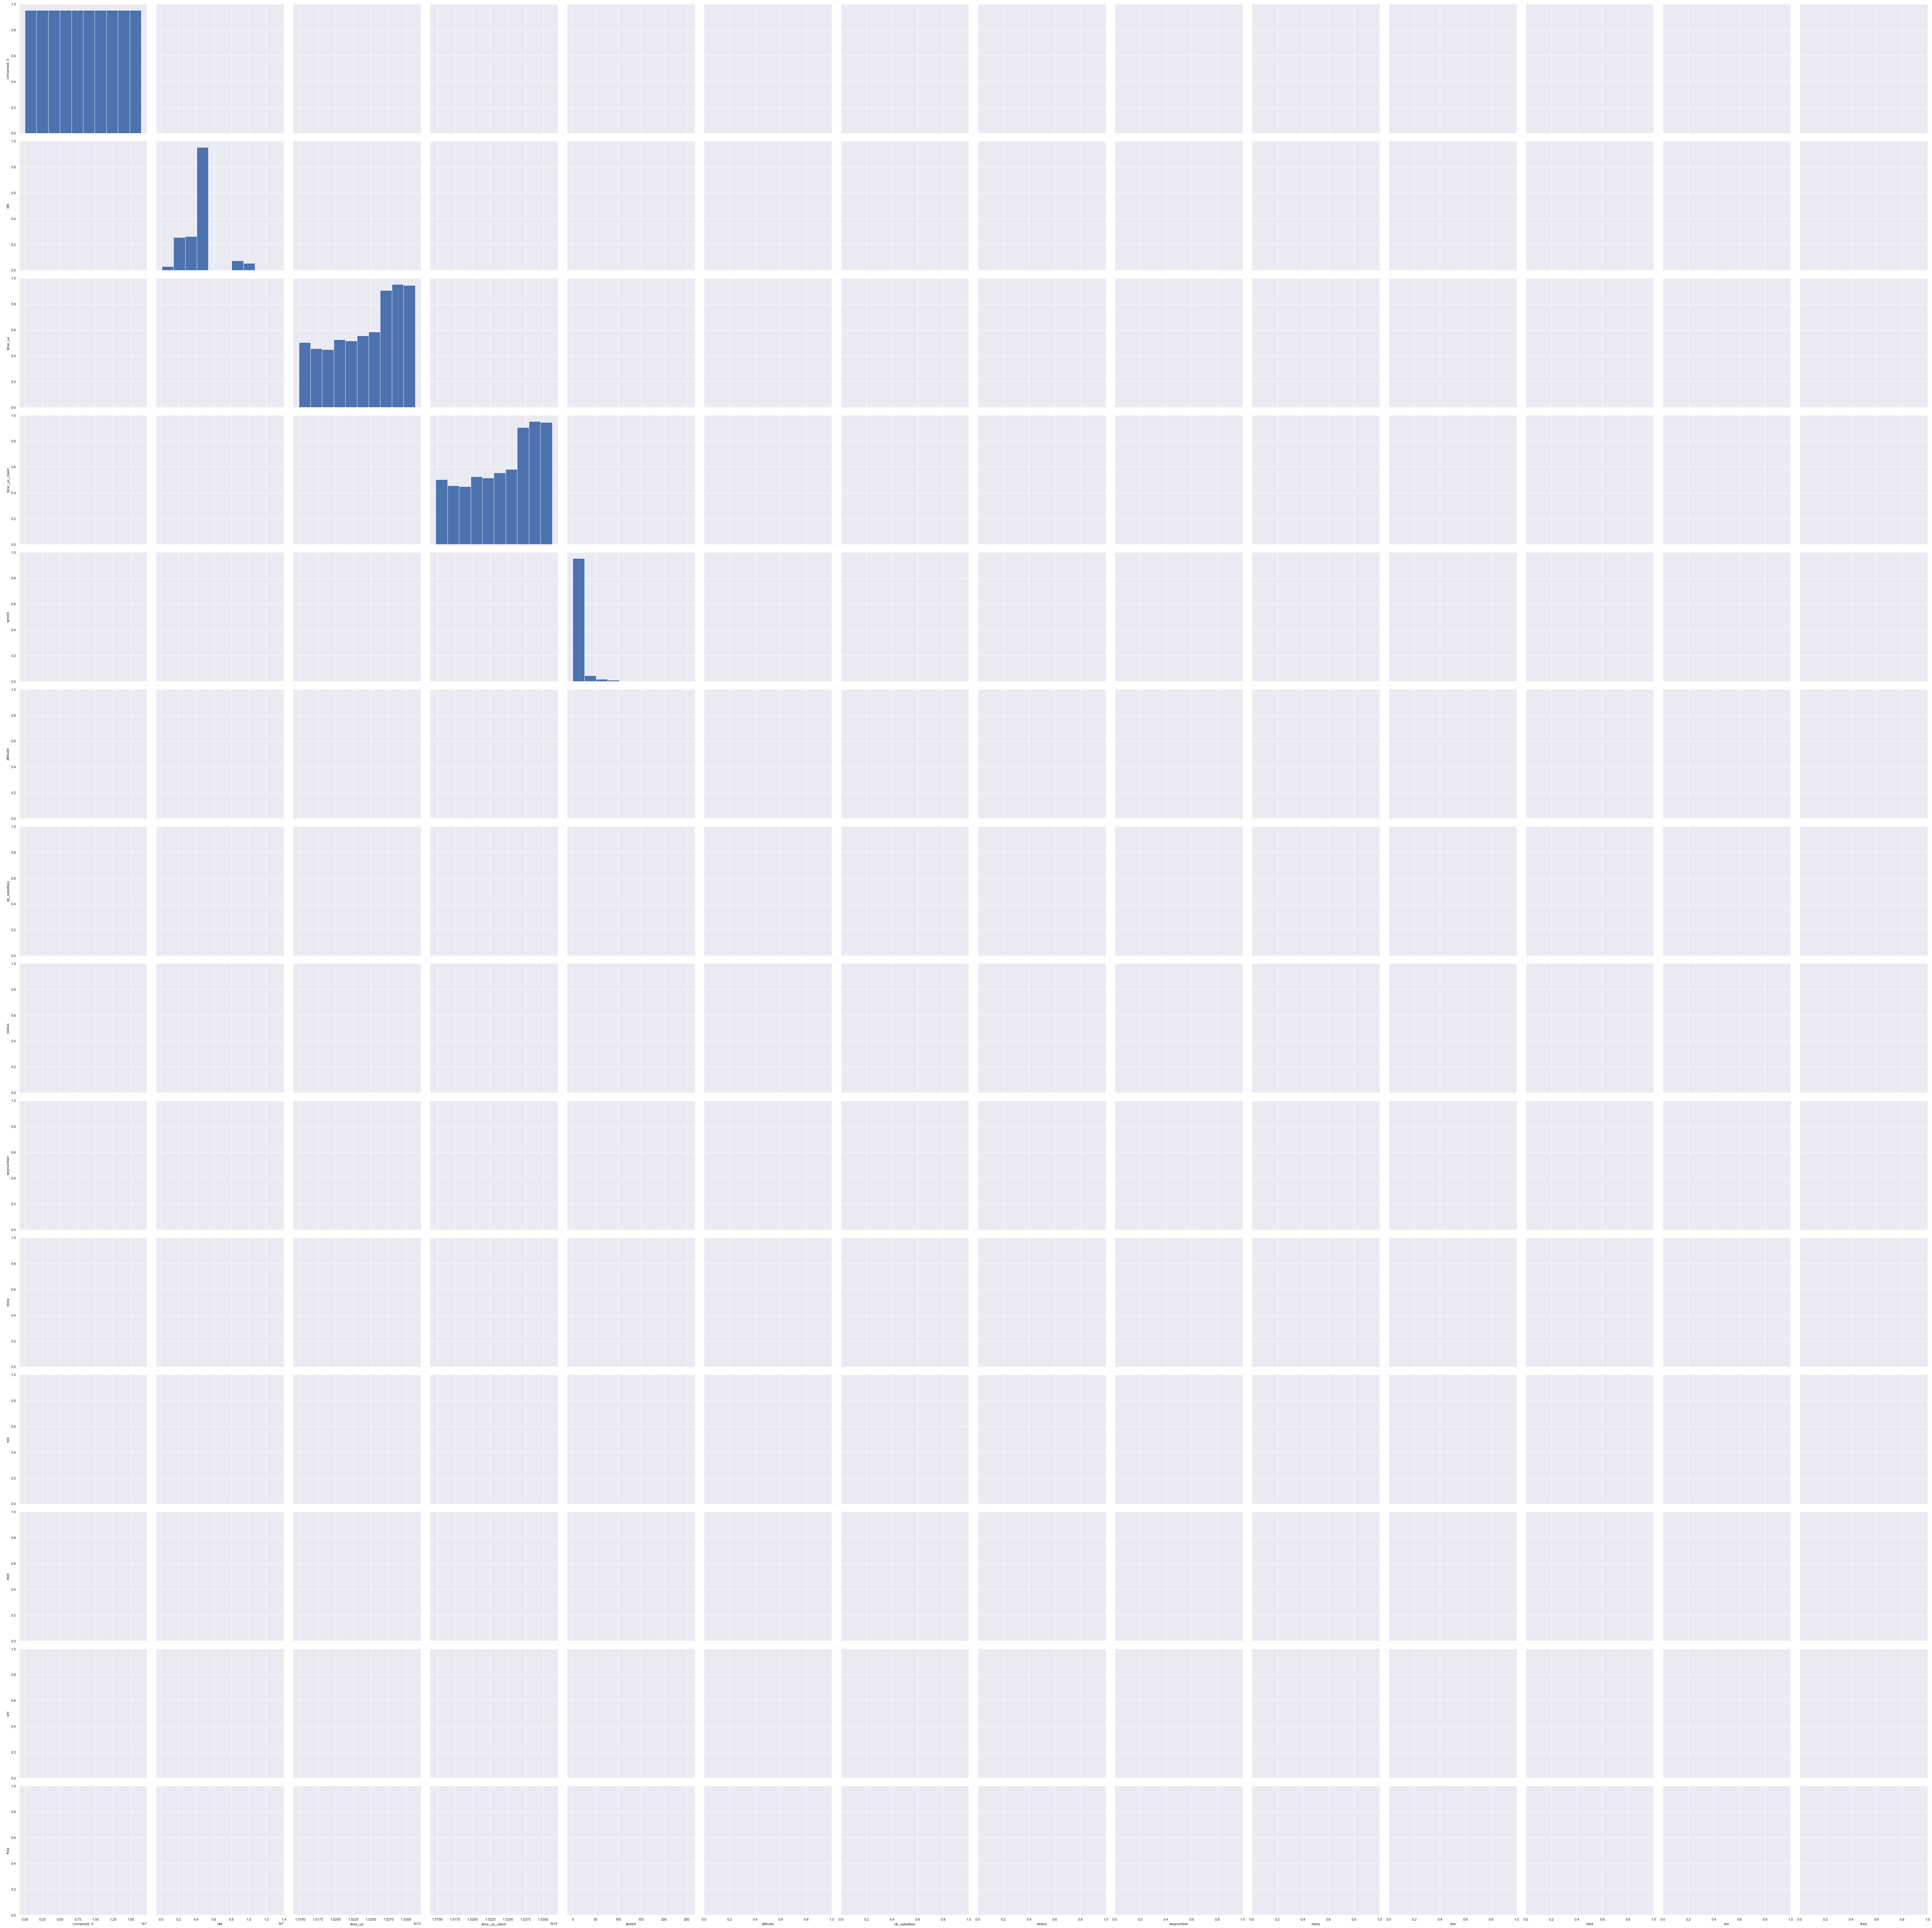

In [11]:
sns.pairplot(train_df, kind='scatter' ,dropna=True, height=6)

## Checking RSSI parameters


$$ RSSI_{received} = RSSI_{sent} - 10 \times n \times log(\frac{d}{d_0}) + err $$ where $d$ is the distance from the message to a base station, and $n$ and $d_0$ are different for each antenna

In [7]:
rssi_path = 'data/rssi_params.csv'
df_params = pd.read_csv(rssi_path, sep=';').drop('Unnamed: 0', axis=1)

In [8]:
df_params.head()

,bsid,resultat_optims
0,8245,fun: 280.8970654587115\n hess_inv: array...
1,16082,fun: 375.5156537188015\n hess_inv: array...
2,3562,fun: 285.70718574616427\n hess_inv: arra...
3,14280,fun: 320.14874940035554\n hess_inv: arra...
4,1743,fun: 327.22871085930774\n hess_inv: arra...


In [12]:
df_params.iloc[0, 1]

['fun: 280.8970654587115',
 ' hess_inv: array([[8.68783211e-05, 4.54994104e+00],',
 '       [4.54994104e+00, 1.35445141e+06]])',
 '      jac: array([ 4.36382534e+02, -5.52368164e-03])',
 "  message: 'Maximum number of iterations has been exceeded.'",
 '     nfev: 140',
 '      nit: 30',
 '     njev: 35',
 '   status: 1',
 '  success: False',
 '        x: array([-1.47069615e+00,  2.01200493e+04])']

In [11]:
df_params['resultat_optims'] = df_params['resultat_optims'].apply(lambda s: s.strip().split('\n'))

df_params.head()                                                                  

,bsid,resultat_optims
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8...."
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2...."
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1..."
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4..."
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ..."


In [25]:
df_params['resultat_optims'][1][10].strip()#.replace('x: array([', '').replace('])', '').split(',')

'x: array([-1.26660857e+00,  7.63637274e+04])'

In [32]:
df_params['n_d0'] = df_params['resultat_optims']\
    .apply(lambda l: l[10].strip().replace('x: array([', '').replace('])', '').split(','))
df_params.head()

,bsid,resultat_optims,n_d0
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8....","[-1.47069615e+00, 2.01200493e+04]"
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2....","[-1.26660857e+00, 7.63637274e+04]"
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1...","[-1.17931016e+00, 7.70912305e+04]"
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4...","[-1.34013661e+00, 4.53698591e+04]"
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ...","[-1.18933852e+00, 6.91214385e+04]"


In [33]:
df_params['n'] = df_params['n_d0'].apply(lambda l: float(l[0]))
df_params['d0'] = df_params['n_d0'].apply(lambda l: float(l[1]))

df_params.head()


,bsid,resultat_optims,n_d0,n,d0
0,8245,"[fun: 280.8970654587115, hess_inv: array([[8....","[-1.47069615e+00, 2.01200493e+04]",-1.470696,20120.0493
1,16082,"[fun: 375.5156537188015, hess_inv: array([[2....","[-1.26660857e+00, 7.63637274e+04]",-1.266609,76363.7274
2,3562,"[fun: 285.70718574616427, hess_inv: array([[1...","[-1.17931016e+00, 7.70912305e+04]",-1.179310,77091.2305
3,14280,"[fun: 320.14874940035554, hess_inv: array([[4...","[-1.34013661e+00, 4.53698591e+04]",-1.340137,45369.8591
4,1743,"[fun: 327.22871085930774, hess_inv: array([[ ...","[-1.18933852e+00, 6.91214385e+04]",-1.189339,69121.4385


In [34]:
df_params[['bsid', 'n', 'd0']].to_csv('data/rssi_params_parsed.csv', sep=';', encoding='utf8')

## Verifying consistency of n, d0

In [3]:
df_rssi = pd.read_csv('data/rssi_params_parsed.csv', sep=';').drop('Unnamed: 0', axis=1)
df_bs = pd.read_csv('data/base_station_coord.csv', sep=';').drop('Unnamed: 0', axis=1)

df_bs.head()

,bsid,lng,lat
0,27.0,1.472871,43.601809
1,114.0,1.432840,43.614204
2,196.0,1.314000,43.825000
3,289.0,1.511350,43.543751
4,326.0,2.209572,41.407587


In [4]:
df_bs_tot = df_rssi.merge(df_bs, on='bsid')

df_bs_tot.head()

,bsid,n,d0,lng,lat
0,8245,-1.470696,20120.0493,2.348134,48.904225
1,16082,-1.266609,76363.7274,2.502571,48.825201
2,3562,-1.179310,77091.2305,2.380534,48.866615
3,14280,-1.340137,45369.8591,2.343745,48.891944
4,1743,-1.189339,69121.4385,2.347290,48.848211


In [5]:
df_features = train_df[['messageid', 'latitude', 'longitude', 'rssi', 'bsid']].merge(df_bs_tot, on='bsid')

del train_df
df_features.head()

,messageid,latitude,longitude,rssi,bsid,n,d0,lng,lat
0,5b216b5ae541cd3845b8c2c5,48.984978,2.361960,-134,8245,-1.470696,20120.0493,2.348134,48.904225
1,5b386565e541cd4403e4b618,48.900833,2.285278,-139,8245,-1.470696,20120.0493,2.348134,48.904225
2,5a93bee812f143187c78ed6c,48.908703,2.315760,-115,8245,-1.470696,20120.0493,2.348134,48.904225
3,5b0dd1d6cf554f36d2beaa05,48.900731,2.285511,-136,8245,-1.470696,20120.0493,2.348134,48.904225
4,5a52a95a12f1431c0bd7ae48,48.952606,2.276512,-128,8245,-1.470696,20120.0493,2.348134,48.904225


In [6]:
from geopy.distance import geodesic

In [7]:
df_features.rename({'lng': 'latitude_bs', 'lat': 'longitude_bs'}, axis=1, inplace=True)
df_features.head()

,messageid,latitude,longitude,rssi,bsid,n,d0,latitude_bs,longitude_bs
0,5b216b5ae541cd3845b8c2c5,48.984978,2.361960,-134,8245,-1.470696,20120.0493,2.348134,48.904225
1,5b386565e541cd4403e4b618,48.900833,2.285278,-139,8245,-1.470696,20120.0493,2.348134,48.904225
2,5a93bee812f143187c78ed6c,48.908703,2.315760,-115,8245,-1.470696,20120.0493,2.348134,48.904225
3,5b0dd1d6cf554f36d2beaa05,48.900731,2.285511,-136,8245,-1.470696,20120.0493,2.348134,48.904225
4,5a52a95a12f1431c0bd7ae48,48.952606,2.276512,-128,8245,-1.470696,20120.0493,2.348134,48.904225


In [9]:
def exact_dist(index_row):
    index, row = index_row
    print(index)
    return geodesic((row['latitude'], row['longitude']), (row['latitude_bs'], row['longitude_bs'])).km

In [10]:
from multiprocessing import Pool

In [ ]:
%%time
# exact_distances = []

# for index, row in df_features.iterrows():
#     new_distance = geodesic((row['latitude'], row['latitude_bs']), (row['longitude'], row['longitude_bs']))
#     exact_distances.append(new_distance)
pool = Pool(10)

exact_distances = pool.map(exact_dist, df_features.iterrows())

pool.close()
pool.join()

df_features['exact_distance'] = exact_distances

df_features.head()
    

# df_features\
#     .apply(lambda row: geodesic((row['latitude'], row['latitude_bs']), (row['longitude'], row['longitude_bs']), axis=1))
# df_features.head()

In [26]:
from multiprocessing import Pool

In [31]:
def estim_dist(index_row):
    _, row= index_row
    return row['d0'] * np.exp(row['rssi'] / row['n'])

In [ ]:
%%time
estimated_distances = []

pool = Pool(20)

estimated_distances = pool.map(estim_dist, df_features.iterrows())

pool.close()
pool.join()
                               

# for index, row in df_features.iterrows():
#     dist = row['d0'] * np.exp(row['rssi'] / row['n'])
#     estimated_distances.append(dist)

df_features['estimated_distance'] = estimated_distances

Exception in thread Thread-20:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 366, in _handle_workers
    pool._maintain_pool()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 240, in _maintain_pool
    self._repopulate_pool()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 233, in _repopulate_pool
    w.start()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/usr/lib/python3.5/multiprocessing/context.py", line 267, in _Popen
    return Popen(process_obj)
  File "/usr/lib/python3.5/multiprocessing/popen_fork.py", line 20, in __init__
    self._launch(process_obj)
  File "/usr/lib/python3.5/multiprocessing/popen_fork.py", line 67, in _launch
    self.pid = os.fork

In [ ]:
sns.jointplot(data=df_features, x='exact_distance', y='estimated_distance', kins='reg')